In [94]:
import mlrose_hiive as mr
from mlrose_hiive.decorators import short_name
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
sns.set_style("whitegrid")

In [57]:
#package
#define

In [82]:
np.random.seed()
weight = np.random.randint(1,100, size =10)
value = np.random.randint(1,100, size = 10)
maximum_pct = round(np.random.random(),2)
print(weight)
print(value)
print(maximum_pct)

[31 32 97 91 98 55 80 67 58  7]
[94 19 83  3 64 67 21 15 29 99]
0.58


In [83]:
k_fitness = mr.Knapsack(weight, value, maximum_pct)

In [84]:
problem = mr.DiscreteOpt(length = 10,
                         fitness_fn = k_fitness,
                         maximize = True,
                         max_val = 2)

In [85]:
start_time = time.perf_counter()
rhc_best_state, rhc_best_fitness, rhc_curve = mr.random_hill_climb(problem = problem,
                           max_attempts = 1000,
                           curve = True,
                           random_state = 42,
                           restarts = 100,
                           max_iters=5000
                           )
rhc_time = time.perf_counter() - start_time
print("RHC best fitness: {0:.0f} in {1:.4f} seconds and {2} iterations".format(rhc_best_fitness, rhc_time, len(rhc_curve)))

RHC best fitness: 426 in 2.9227 seconds and 1005 iterations


try different schedule and number of iterations

In [86]:
sa_schedule = mr.ExpDecay()
start_time = time.perf_counter()
sa_best_state, sa_best_fitness, sa_curve = mr.simulated_annealing(problem,
                                                                      schedule=sa_schedule,
                                                                      max_attempts=1000,
                                                                      max_iters=5000,
                                                                      curve=True,
                                                                      random_state=42)
sa_time = time.perf_counter() - start_time
print("SA best fitness: {0:.0f} in {1:.4f} seconds and {2} iterations".format(sa_best_fitness, sa_time, len(sa_curve)))

SA best fitness: 304 in 0.0369 seconds and 1003 iterations


In [89]:
# ga
ga_max_attempts = 1000
ga_max_iters = 5000
ga_pop_size = 50
ga_mutation_prob = 0.2
start_time = time.perf_counter()
ga_best_state, ga_best_fitness, ga_curve = mr.genetic_alg(problem,
                                                              pop_size=ga_pop_size,
                                                              mutation_prob=ga_mutation_prob,
                                                              max_attempts=ga_max_attempts,
                                                              max_iters=ga_max_iters,
                                                              curve=True,
                                                              random_state=42)
ga_time = time.perf_counter() - start_time
print("GA fitness {0:.0f} in {1:.4f} seconds and {2} iterations".format(ga_best_fitness, ga_time, len(ga_curve)))
# print('GA best state:\n', ga_best_state)

GA fitness 436 in 3.5658 seconds and 1008 iterations


In [88]:
#mimic
mimic_max_attempts = 1000
mimic_max_iters = 5000
mimic_pop_size = 200
mimic_keep_pct = 0.3
start_time = time.perf_counter()
mimic_best_state, mimic_best_fitness, mimic_curve = mr.mimic(problem,
                                                                 pop_size=mimic_pop_size,
                                                                 keep_pct=mimic_keep_pct,
                                                                 max_attempts=mimic_max_attempts,
                                                                 max_iters=mimic_max_iters,
                                                                 curve=True,
                                                                 random_state=42,
                                                                 )
mimic_time = time.perf_counter() - start_time
print("MIMIC fitness {0:.0f} in {1:.4f} seconds and {2} iterations".format(mimic_best_fitness, mimic_time, len(mimic_curve)))

MIMIC fitness 436 in 47.4616 seconds and 1002 iterations


In [92]:
df = pd.DataFrame({'RHC':[x[0] for x in rhc_curve[:50]],
                   'SA': [x[0] for x in sa_curve[:50]],
                   'GA': [x[0] for x in ga_curve[:50]],
                   'MIMIC': [x[0] for x in mimic_curve[:50]]})

Text(0, 0.5, 'Fitness')

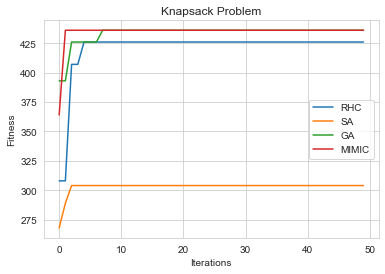

In [97]:
ax = df.plot(title = 'Knapsack Problem')
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')